# StyleGAN2-ADA

```
Step 1. Initial Setting and load pre-trained model
     1-a. import libraries
     1-b. clone the stylegan2-ada's git repository
     1-c. load pre-trained model that trained on afhqdog dataset
Step 2. generate sample fake-dog images
     2-a. a quick look at the model
     2-b. try submodels : g_mapping, g_synthesis
     ---
     
3. [generate.py] get latent vectors and image morping(interpolation)
4. get age vecmtor (latent1 - latent2)
5. get another image
```

### Step 1. Initial Setting and load pre-trained model

**1-a. Import Libraries**

In [ ]:
import torch
import torchvision

import numpy as np

import pickle

import matplotlib.pyplot as plt

**1-b. clone the `stylegan2-ada`'s git repository**

In [ ]:
!git clone https://github.com/NVlabs/stylegan2-ada-pytorch.git

In [2]:
%cd stylegan2-ada-pytorch

/kaggle/working/stylegan2-ada-pytorch


In [3]:
!ls

Dockerfile	 dataset_tool.py  generate.py	style_mixing.py        training
LICENSE.txt	 dnnlib		  legacy.py	stylegan2-ada-pytorch
README.md	 docker_run.sh	  metrics	torch_utils
calc_metrics.py  docs		  projector.py	train.py


In [12]:
!ls ../../input

afhq-dog-pretrained  animal-faces


**1-c. load pre-trained model that trained on `afhqdog` dataset**

In [68]:
with open('../../input/afhq-dog-pretrained/afhqdog.pkl', 'rb') as f:
    G = pickle.load(f)['G_ema'].cuda()

### Step 2. generate sample fake-dog images

**2-a. A quick look at the model**

The image generator `G` can be used like this :

In [88]:
z = torch.randn([1, G.z_dim]).cuda()
c = None
img = G(z,c)

In [89]:
img.size()

torch.Size([1, 3, 512, 512])

In [98]:
torch.min(img)

tensor(-1.3576, device='cuda:0')

In [90]:
img.squeeze(0).size()

torch.Size([3, 512, 512])

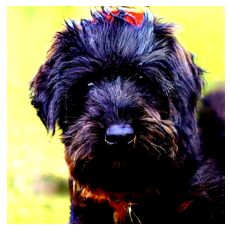

In [104]:
plt.imshow((img+0.5).cpu().squeeze(0).permute(1,2,0))
plt.axis('off')
plt.show();

**2-b. Try submodels : g_mapping, g_synthesis**

It is also possible to divide the G model into submodels.
- we will use this method in more detail, since we plan to adjust the latent vector later

In [49]:
g_mapping = G.mapping
g_synthesis = G.synthesis

Let's take a look at the model structure to see how it is implemented

In [50]:
g_mapping

MappingNetwork(
  (fc0): FullyConnectedLayer()
  (fc1): FullyConnectedLayer()
  (fc2): FullyConnectedLayer()
  (fc3): FullyConnectedLayer()
  (fc4): FullyConnectedLayer()
  (fc5): FullyConnectedLayer()
  (fc6): FullyConnectedLayer()
  (fc7): FullyConnectedLayer()
)

In [51]:
g_synthesis

SynthesisNetwork(
  (b4): SynthesisBlock(
    (conv1): SynthesisLayer(
      (affine): FullyConnectedLayer()
    )
    (torgb): ToRGBLayer(
      (affine): FullyConnectedLayer()
    )
  )
  (b8): SynthesisBlock(
    (conv0): SynthesisLayer(
      (affine): FullyConnectedLayer()
    )
    (conv1): SynthesisLayer(
      (affine): FullyConnectedLayer()
    )
    (torgb): ToRGBLayer(
      (affine): FullyConnectedLayer()
    )
  )
  (b16): SynthesisBlock(
    (conv0): SynthesisLayer(
      (affine): FullyConnectedLayer()
    )
    (conv1): SynthesisLayer(
      (affine): FullyConnectedLayer()
    )
    (torgb): ToRGBLayer(
      (affine): FullyConnectedLayer()
    )
  )
  (b32): SynthesisBlock(
    (conv0): SynthesisLayer(
      (affine): FullyConnectedLayer()
    )
    (conv1): SynthesisLayer(
      (affine): FullyConnectedLayer()
    )
    (torgb): ToRGBLayer(
      (affine): FullyConnectedLayer()
    )
  )
  (b64): SynthesisBlock(
    (conv0): SynthesisLayer(
      (affine): FullyConnec

make latent vector(space) `z` from random gaussian distribution

In [105]:
z = torch.randn([1, G.z_dim]).cuda()
z.size()

torch.Size([1, 512])

transforms `z` into the intermediate latent space `w` (disentangled space)

In [106]:
w = g_mapping(z, None)
w.size()

torch.Size([1, 16, 512])

Now pass `w`(transformed `z`) through the synthesis network to create the `fake image`

In [107]:
img = g_synthesis(w)
img = img.cpu()
img = img.squeeze(0)
img.size()

torch.Size([3, 512, 512])

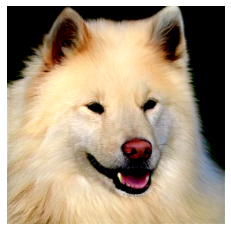

In [110]:
plt.imshow((img+0.3).permute(1,2,0))
plt.axis('off')
plt.show();